In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import matplotlib.cbook as cbook

### Most of my tunable parameters are up here

In [4]:
## Simulation Settings =================

# Number of districts
n_dists = 10

# Number of trials
n_trials = 10000

# A distribution of percent minority per district
#  (for each trial, some random normal noise is added to them.  Not meant to mimic the actual data)
# (with these settings the mean will be 0.3/(1+0.3) = 0.23 and heavily skewed towards 0)
pct_dist = np.random.beta(a=0.3,b=1,size=(n_dists,))



## Boxplot Settings ====================

# Number of iterations to compare for each set of boxes
#steps = [100, 1000, 10000]
n_steps = 4
steps = np.logspace(2, np.log10(n_trials), n_steps).astype(int)
steps[-1] = n_trials


# Settings for whiskers

# Default - 1.5 of IQR
whis = 1.5

# 1st and 99th percentiles
#whis = [1, 99]

# Min and max
#whis = [0, 100]

# Boxplot properties
#      more examples: https://matplotlib.org/3.1.1/gallery/statistics/boxplot.html

flierprops = dict(marker='.', 
                  markersize=0) # Setting to 0 turns fliers off

medianprops = dict(linestyle='-',
                   color='k')

boxprops = dict(color='k')

## KDE settings

# Have the opportunity to get more granular here
n_steps_kde = 10
kde_steps = np.logspace(2, np.log10(n_trials), n_steps_kde).astype(int)
kde_steps[-1] = n_trials

### Simulate results per district - just defining some arbitrary marginal distributions and pulling from those

In [3]:
# Row and column names
row_names = ['District' + str(d+1) for d in range(n_dists)]
col_names = ['Trial' + str(i+1) for i in range(n_trials)]

# Dataframe to store results
results = pd.DataFrame(index=row_names, columns=col_names)

t0 = dt.now()
for t in range(n_trials):
    pct_trial = np.random.normal(loc=pct_dist, scale=0.05)
    pct_trial = np.minimum(np.maximum(pct_trial, 0),1)
    results.iloc[:,t] = pct_trial
print(dt.now()-t0, 'sec(s) to create')

/tmp/ipykernel_256/2358519421.py:12: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  results.iloc[:,t] = pct_trial


0:00:06.410508 sec(s) to create


In [4]:
# Preview results
results.head(2)

,Trial1,Trial2,Trial3,Trial4,Trial5,Trial6,Trial7,Trial8,Trial9,Trial10,...,Trial9991,Trial9992,Trial9993,Trial9994,Trial9995,Trial9996,Trial9997,Trial9998,Trial9999,Trial10000
District1,0.121402,0.000000,0.071116,0.112845,0.141113,0.089120,0.043105,0.091856,0.144743,0.067919,...,0.049069,0.000000,0.024221,0.011154,0.062450,0.014012,0.07243,0.028851,0.000000,0.057549
District2,0.290987,0.350946,0.302368,0.315174,0.264379,0.236785,0.257886,0.273272,0.333383,0.300733,...,0.299149,0.269273,0.276762,0.284329,0.337529,0.387179,0.30600,0.285730,0.402543,0.317458


In [5]:
# Sort by mean bva over all simulation results (visual aid for plotting)
results = results.assign(m=results.mean(axis=1)).sort_values('m').drop('m', axis=1)

In [6]:
# check first few trials
results.iloc[:,0:5]

,Trial1,Trial2,Trial3,Trial4,Trial5
District6,0.000000,0.000000,0.000000,0.009183,0.000000
District5,0.009396,0.000000,0.000000,0.000000,0.005175
District4,0.000000,0.034148,0.000000,0.087529,0.000000
District3,0.021711,0.000000,0.067003,0.145239,0.000000
District1,0.121402,0.000000,0.071116,0.112845,0.141113
District7,0.080517,0.038291,0.000000,0.082832,0.071620
District2,0.290987,0.350946,0.302368,0.315174,0.264379
District9,0.424242,0.401201,0.500241,0.432935,0.555413
District8,0.472023,0.483505,0.427114,0.379949,0.454487
District10,0.846235,0.811939,0.787541,0.802121,0.805466


In [7]:
# Compute statistics for the boxplots, for each subset of data
#   documentation for this approach: https://matplotlib.org/stable/gallery/statistics/bxp.html

t0 = dt.now()
stats = []
for s in steps:
    stats.append(cbook.boxplot_stats(results.iloc[:,0:int(s)].T, whis = whis))
print(dt.now()-t0, 'sec(s) to compute boxplot stats')

0:00:00.024467 sec(s) to compute boxplot stats


### Figure A

Iterations in each bar: [  100   464  2154 10000]


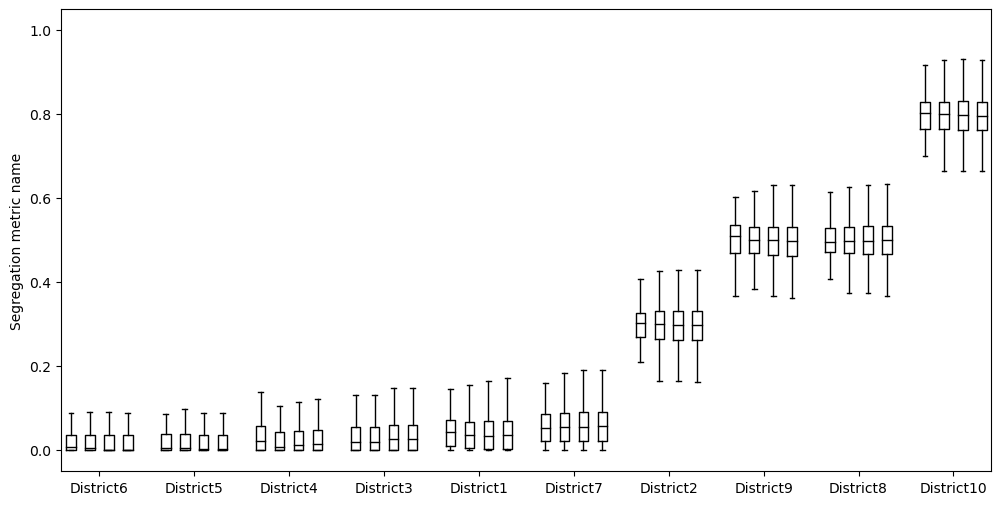

In [8]:
# Positions for the boxes. Skip 1 position every district for visual grouping
pos = np.arange(0, n_dists)
box_pos = len(steps)*pos + 1
box_pos += range(len(box_pos))

# Position for the x-axis tick labels (in the middle of each districts group of boxes)
tick_pos = box_pos + (len(steps)+1)/2 - 1


fig, ax = plt.subplots(figsize=(12,6))
# Looping over each subset of data (e.g, 100 trials, 1000 trials, etc.)
for i,s in enumerate(steps):
    data = stats[i]
    # Create the boxplots
    ax.bxp(data, positions = box_pos+i, 
           widths=0.5,
           boxprops = boxprops,
           flierprops = flierprops,
           medianprops = medianprops
          )
print('Iterations in each bar:', steps)
plt.xticks(tick_pos, list(results.index), rotation=0)
plt.ylabel('Segregation metric name')
plt.show()

### Figure B

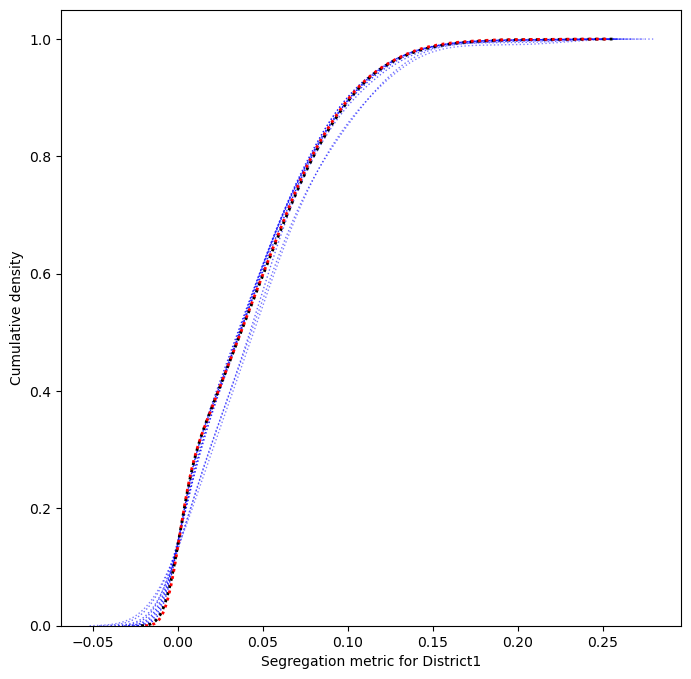

Number of steps in each curve: [  100   166   278   464   774  1291  2154  3593  5994 10000]


In [9]:
# Showing convergence for individual districts as overlaid cumulative KDE plots
ex_dist = 'District1'
temp = results.loc[ex_dist]


alphas = np.linspace(0.5, 1, len(kde_steps))
plt.figure(figsize=(8,8))
for i,s in enumerate(kde_steps):
    
    # Show smaller samples as thin blue dotted with varying alpha
    # Show final two as dotted black and dotted red, thick
    
    if i == (len(kde_steps)-1):
        linestyle=':'
        color = 'r'
        linewidth = 2
        alpha = 1
    elif i == (len(kde_steps)-2):
        linestyle=':'
        color = 'k'
        linewidth = 2
        alpha = 1
    else:
        linestyle=':'
        color = 'b'
        linewidth = 1
        alpha = alphas[i]

    sns.kdeplot(temp[0:s], 
                color = color, 
                alpha = alpha, 
                linestyle = linestyle,
                linewidth = linewidth, 
                cumulative=True)

plt.ylabel('Cumulative density')
plt.xlabel('Segregation metric for ' + ex_dist)
plt.show()

print('Number of steps in each curve:', kde_steps)

In [ ]:
fig1, ax1 = plt.subplots(figsize=(10,10))

#ax1.hist(seg_data.iloc[:,:1000].stack().values, bins=500, rwidth=1, alpha=.3, color="b", label="all", density=True)
pd.DataFrame(seg_data.iloc[:,:10000].stack().values).plot(kind='density', ax=ax1, color="cornflowerblue",legend=False)

#x1.hist(seg_data.iloc[:,:5000].stack().values, bins=500, rwidth=1, alpha=.3, color="red", label="all", density=True)
pd.DataFrame(seg_data.iloc[:,:50000].stack().values).plot(kind='density', ax=ax1, color="teal",legend=False)

#ax1.hist(seg_data.iloc[:,:7500].stack().values, bins=500, rwidth=1, alpha=.3, color="green", label="all", density=True)
pd.DataFrame(seg_data.iloc[:,:75000].stack().values).plot(kind='density', ax=ax1, color="red",legend=False)

#ax1.hist(seg_data.iloc[:,:7500].stack().values, bins=500, rwidth=1, alpha=.3, color="green", label="all", density=True)
pd.DataFrame(seg_data.iloc[:,:95000].stack().values).plot(kind='density', ax=ax1, color="darkorange",legend=False)

#ax1.hist(seg_data.stack().values, bins=500, rwidth=1, alpha=.3, color="purple", label="all", density=True)
pd.DataFrame(seg_data.stack().values).plot(kind='density', ax=ax1, color="rebeccapurple",legend=False)

plt.legend(labels=["10,000 Iterations", "50,000 Iterations", "75,000 Iterations", "95,000 Iterations", "100,000 Iterations"],
            prop={'size':12})
ax1.set_xlabel("Segregation Score", fontsize=12)
ax1.set_ylabel("Frequency", fontsize=12)
ax1.set_yticks([])

plt.savefig("line_compare")
plt.show()

In [1]:
steps

NameError: name 'steps' is not defined